In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import font_manager, rc

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/날씨빅데이터티이임/EDA/기상청 결측치 채움-1.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
# 변수마다 NaN의 비중
for col in df.columns:
    na = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(na)

column:         날짜	 percent of NaN value: 0.00%
column:       시간_분	 percent of NaN value: 0.00%
column:      관측소지점	 percent of NaN value: 0.00%
column:         위도	 percent of NaN value: 0.00%
column:         경도	 percent of NaN value: 0.00%
column:      자외선지수	 percent of NaN value: 0.00%
column:    파랑_가시밴드	 percent of NaN value: 0.00%
column:    초록_가시밴드	 percent of NaN value: 0.00%
column:    빨강_가시밴드	 percent of NaN value: 0.00%
column:    식생_가시밴드	 percent of NaN value: 0.00%
column:  눈/얼음_가시밴드	 percent of NaN value: 0.00%
column:      권운_밴드	 percent of NaN value: 0.00%
column: 야간안개/하층운_밴드	 percent of NaN value: 0.00%
column:  상층_수증기_밴드	 percent of NaN value: 0.00%
column:  중층_수증기_밴드	 percent of NaN value: 0.00%
column:  하층_수증기_밴드	 percent of NaN value: 0.00%
column:     구름상_밴드	 percent of NaN value: 0.00%
column:      오존_밴드	 percent of NaN value: 0.00%
column:     대기창_밴드	 percent of NaN value: 0.00%
column: 깨끗한_대기창_밴드	 percent of NaN value: 0.00%
column: 오염된_대기창_밴드	 percent of NaN valu

In [ ]:
pd.options.display.max_rows =4000
pd.options.display.max_columns = 30

In [ ]:
df.describe()
# 자외선 지수 음수 존재

날짜          시간_분         관측소지점            위도            경도  \
count  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06   
mean   2.020566e+07  1.175000e+03  1.272000e+02  1.278316e+02  3.610407e+01   
std    5.012494e+03  6.924295e+02  3.555129e+01  1.376363e+00  1.182672e+00   
min    2.020010e+07  0.000000e+00  1.300000e+01  1.261600e+02  3.330000e+01   
25%    2.020070e+07  5.875000e+02  1.120000e+02  1.266249e+02  3.517294e+01   
50%    2.020123e+07  1.175000e+03  1.330000e+02  1.273721e+02  3.603259e+01   
75%    2.021070e+07  1.762500e+03  1.520000e+02  1.290320e+02  3.747772e+01   
max    2.021123e+07  2.350000e+03  1.650000e+02  1.308986e+02  3.775147e+01   

              자외선지수       파랑_가시밴드       초록_가시밴드       빨강_가시밴드       식생_가시밴드  \
count  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06   
mean   1.079884e+00  9.923767e-02  9.559605e-02  8.880002e-02  1.056418e-01   
std    1.957400e+00  1.517917e-01  1.512122e-01  1.516316e-01  1.687951e-01   
min   -3.026723e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  1.246000e-02  1.084000e-02  6.850000e-03  7.630000e-03   
75%    1.300000e+00  1.433200e-01  1.317300e-01  1.102700e-01  1.524700e-01   
max    2.360000e+01  1.052540e+00  1.068690e+00  1.122040e+00  1.161110e+00   

          눈/얼음_가시밴드         권운_밴드   야간안개/하층운_밴드     상층_수증기_밴드     중층_수증기_밴드  \
count  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06   
mean   1.198000e-02  6.815654e-02  2.793437e+02  2.367706e+02  2.448515e+02   
std    3.750703e-02  1.021978e-01  1.669474e+01  6.289224e+00  7.889527e+00   
min    0.000000e+00  0.000000e+00  1.527700e+02  1.964636e+02  1.952607e+02   
25%    0.000000e+00  0.000000e+00  2.686830e+02  2.329808e+02  2.408605e+02   
50%    0.000000e+00  3.220000e-03  2.806649e+02  2.370773e+02  2.458818e+02   
75%    3.020000e-03  1.128700e-01  2.914602e+02  2.411036e+02  2.501817e+02   
max    6.089700e-01  7.107700e-01  3.212326e+02  2.626168e+02  2.721262e+02   

          하층_수증기_밴드        구름상_밴드         오존_밴드        대기창_밴드    깨끗한_대기창_밴드  \
count  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06   
mean   2.516733e+02  2.701121e+02  2.500747e+02  2.717897e+02  2.712438e+02   
std    9.356217e+00  1.668280e+01  9.887436e+00  1.750934e+01  1.783145e+01   
min    1.954363e+02  1.945446e+02  2.126870e+02  1.944925e+02  1.938486e+02   
25%    2.476904e+02  2.605076e+02  2.437675e+02  2.618063e+02  2.609627e+02   
50%    2.537597e+02  2.730988e+02  2.505197e+02  2.748120e+02  2.745639e+02   
75%    2.579220e+02  2.825311e+02  2.574022e+02  2.848151e+02  2.847088e+02   
max    2.754439e+02  3.069993e+02  3.072160e+02  3.112966e+02  3.102730e+02   

         오염된_대기창_밴드      이산화탄소_밴드         태양천정각         위성천정각        대기외일사량  \
count  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06  1.578960e+06   
mean   2.693903e+02  2.580197e+02  8.898176e+01  4.211422e+01 -3.938039e-02   
std    1.722386e+01  1.262647e+01  3.806119e+01  1.339209e+00  5.437120e+00   
min    1.938772e+02  1.962145e+02  9.868750e+00  3.896359e+01 -9.630860e+00   
25%    2.595226e+02  2.515540e+02  5.856060e+01  4.104849e+01 -4.806660e+00   
50%    2.730559e+02  2.607272e+02  8.885167e+01  4.202608e+01  1.785500e-02   
75%    2.825500e+02  2.674952e+02  1.198613e+02  4.367046e+01  4.845467e+00   
max    3.051737e+02  2.815333e+02  1.700420e+02  4.395463e+01  9.025490e+00   

               관측고도          지면타입  
count  1.578960e+06  1.578960e+06  
mean   6.863933e+01  2.400000e+00  
std    4.635743e+01  1.254326e+00  
min    2.280000e+00  0.000000e+00  
25%    4.700000e+01  2.000000e+00  
50%    6.894000e+01  3.000000e+00  
75%    7.238000e+01  3.000000e+00  
max    2.228000e+02  4.000000e+00

In [ ]:
df['년도']=df['날짜'].astype(str).str[0:4].astype(int)
df['월']=df['날짜'].astype(str).str[4:6].astype(int)

In [ ]:
def 계절(월) :
    if 3<=월<=5:
        return '봄'
    elif 6<=월 <=8:
        return '여름'
    elif 9<=월<=11:
        return '가을'
    elif 12<=월:
        return '겨울'
    elif 1<=월<=2:
        return '겨울'

In [ ]:
df['계절']= df['월'].apply(계절)

In [ ]:
df

날짜    시간_분  관측소지점         위도        경도  자외선지수  파랑_가시밴드  \
0        20200101.0     0.0   13.0  126.16000  33.30000    0.0      0.0   
1        20200101.0    10.0   13.0  126.16000  33.30000    0.0      0.0   
2        20200101.0    20.0   13.0  126.16000  33.30000    0.0      0.0   
3        20200101.0    30.0   13.0  126.16000  33.30000    0.0      0.0   
4        20200101.0    40.0   13.0  126.16000  33.30000    0.0      0.0   
...             ...     ...    ...        ...       ...    ...      ...   
1578955  20211231.0  2310.0  165.0  126.38121  34.81689    0.0      0.0   
1578956  20211231.0  2320.0  165.0  126.38121  34.81689    0.0      0.0   
1578957  20211231.0  2330.0  165.0  126.38121  34.81689    0.0      0.0   
1578958  20211231.0  2340.0  165.0  126.38121  34.81689    0.0      0.0   
1578959  20211231.0  2350.0  165.0  126.38121  34.81689    0.0      0.0   

         초록_가시밴드  빨강_가시밴드  식생_가시밴드  눈/얼음_가시밴드  권운_밴드  야간안개/하층운_밴드  상층_수증기_밴드  \
0            0.0      0.0      0.0        0.0    0.0    268.21695  241.02138   
1            0.0      0.0      0.0        0.0    0.0    264.78634  241.10364   
2            0.0      0.0      0.0        0.0    0.0    265.59620  241.18569   
3            0.0      0.0      0.0        0.0    0.0    266.50471  241.18569   
4            0.0      0.0      0.0        0.0    0.0    265.72831  240.85620   
...          ...      ...      ...        ...    ...          ...        ...   
1578955      0.0      0.0      0.0        0.0    0.0    268.79796  232.98080   
1578956      0.0      0.0      0.0        0.0    0.0    267.25473  233.08769   
1578957      0.0      0.0      0.0        0.0    0.0    267.37731  232.65778   
1578958      0.0      0.0      0.0        0.0    0.0    268.21695  232.65778   
1578959      0.0      0.0      0.0        0.0    0.0    266.88290  232.87352   

         중층_수증기_밴드  하층_수증기_밴드     구름상_밴드      오존_밴드     대기창_밴드  깨끗한_대기창_밴드  \
0        250.86386  257.12412  267.79360  250.75924  269.97608   269.70811   
1        250.78261  256.69732  265.52586  249.26338  267.39961   267.63692   
2        250.75549  256.76497  266.14464  249.61859  268.27856   268.19710   
3        250.67403  256.89999  266.87906  249.79544  268.44652   268.07856   
4        250.37389  256.62956  266.67011  249.86163  268.64762   268.58556   
...            ...        ...        ...        ...        ...         ...   
1578955  240.86052  249.74889  266.35536  247.22612  267.77262   267.99379   
1578956  240.75493  249.45709  265.40136  246.57815  266.39082   266.38561   
1578957  240.36513  248.73222  264.93667  246.27493  266.13234   265.97049   
1578958  240.40074  249.29708  265.86254  246.83354  267.21247   266.69573   
1578959  240.29381  248.51503  263.92359  245.56927  264.89757   265.30934   

         오염된_대기창_밴드   이산화탄소_밴드      태양천정각     위성천정각  대기외일사량  관측고도  지면타입    년도  \
0         268.61702  259.10334  165.17963  38.96359 -9.5091  71.0   0.0  2020   
1         266.66849  258.21621  166.67178  38.96359 -9.5091  71.0   0.0  2020   
2         267.20654  258.38663  167.94722  38.96359 -9.5091  71.0   0.0  2020   
3         267.50047  258.67009  168.93011  38.96359 -9.5091  71.0   0.0  2020   
4         267.34496  258.50010  169.53722  38.96359 -9.5091  71.0   0.0  2020   
...             ...        ...        ...       ...     ...   ...   ...   ...   
1578955   266.51177  256.36256  155.69170  40.67788 -8.8616  38.0   3.0  2021   
1578956   265.49627  255.45298  157.56294  40.67788 -8.8616  38.0   3.0  2021   
1578957   264.61298  255.08310  159.37752  40.67788 -8.8616  38.0   3.0  2021   
1578958   265.51386  255.56953  161.11812  40.67788 -8.8616  38.0   3.0  2021   
1578959   263.65062  254.37876  162.76137  40.67788 -8.8616  38.0   3.0  2021   

          월  계절  
0         1  겨울  
1         1  겨울  
2         1  겨울  
3         1  겨울  
4         1  겨울  
...      ..  ..  
1578955  12  겨울  
1578956  12  겨울  
1578957  12  겨울  
1578958  12  겨울  
1578959  12  겨울  

[1578960 rows x 30 columns]

In [ ]:
afternoon = 'afternoon'
night = 'night'
df['주/야간'] = np.where(df['태양천정각'] > 90, 'night','afternoon')

In [ ]:
df.loc[(df['파랑_가시밴드']< 0)&(df['주/야간'] == 'night'), '파랑_가시밴드'] = 0
df.loc[(df['초록_가시밴드']< 0)&(df['주/야간'] == 'night'), '초록_가시밴드'] = 0
df.loc[(df['빨강_가시밴드']< 0)&(df['주/야간'] == 'night'), '빨강_가시밴드'] = 0
df.loc[(df['식생_가시밴드']< 0)&(df['주/야간'] == 'night'), '식생_가시밴드'] = 0
df.loc[(df['권운_밴드']< 0)&(df['주/야간'] == 'night'), '권운_밴드'] = 0

In [ ]:
df

날짜    시간_분  관측소지점         위도        경도  자외선지수  파랑_가시밴드  \
0        20200101.0     0.0   13.0  126.16000  33.30000    0.0      0.0   
1        20200101.0    10.0   13.0  126.16000  33.30000    0.0      0.0   
2        20200101.0    20.0   13.0  126.16000  33.30000    0.0      0.0   
3        20200101.0    30.0   13.0  126.16000  33.30000    0.0      0.0   
4        20200101.0    40.0   13.0  126.16000  33.30000    0.0      0.0   
...             ...     ...    ...        ...       ...    ...      ...   
1578955  20211231.0  2310.0  165.0  126.38121  34.81689    0.0      0.0   
1578956  20211231.0  2320.0  165.0  126.38121  34.81689    0.0      0.0   
1578957  20211231.0  2330.0  165.0  126.38121  34.81689    0.0      0.0   
1578958  20211231.0  2340.0  165.0  126.38121  34.81689    0.0      0.0   
1578959  20211231.0  2350.0  165.0  126.38121  34.81689    0.0      0.0   

         초록_가시밴드  빨강_가시밴드  식생_가시밴드  눈/얼음_가시밴드  권운_밴드  야간안개/하층운_밴드  상층_수증기_밴드  \
0            0.0      0.0      0.0        0.0    0.0    268.21695  241.02138   
1            0.0      0.0      0.0        0.0    0.0    264.78634  241.10364   
2            0.0      0.0      0.0        0.0    0.0    265.59620  241.18569   
3            0.0      0.0      0.0        0.0    0.0    266.50471  241.18569   
4            0.0      0.0      0.0        0.0    0.0    265.72831  240.85620   
...          ...      ...      ...        ...    ...          ...        ...   
1578955      0.0      0.0      0.0        0.0    0.0    268.79796  232.98080   
1578956      0.0      0.0      0.0        0.0    0.0    267.25473  233.08769   
1578957      0.0      0.0      0.0        0.0    0.0    267.37731  232.65778   
1578958      0.0      0.0      0.0        0.0    0.0    268.21695  232.65778   
1578959      0.0      0.0      0.0        0.0    0.0    266.88290  232.87352   

         중층_수증기_밴드  ...     구름상_밴드      오존_밴드     대기창_밴드  깨끗한_대기창_밴드  \
0        250.86386  ...  267.79360  250.75924  269.97608   269.70811   
1        250.78261  ...  265.52586  249.26338  267.39961   267.63692   
2        250.75549  ...  266.14464  249.61859  268.27856   268.19710   
3        250.67403  ...  266.87906  249.79544  268.44652   268.07856   
4        250.37389  ...  266.67011  249.86163  268.64762   268.58556   
...            ...  ...        ...        ...        ...         ...   
1578955  240.86052  ...  266.35536  247.22612  267.77262   267.99379   
1578956  240.75493  ...  265.40136  246.57815  266.39082   266.38561   
1578957  240.36513  ...  264.93667  246.27493  266.13234   265.97049   
1578958  240.40074  ...  265.86254  246.83354  267.21247   266.69573   
1578959  240.29381  ...  263.92359  245.56927  264.89757   265.30934   

         오염된_대기창_밴드   이산화탄소_밴드      태양천정각     위성천정각  대기외일사량  관측고도  지면타입    년도  \
0         268.61702  259.10334  165.17963  38.96359 -9.5091  71.0   0.0  2020   
1         266.66849  258.21621  166.67178  38.96359 -9.5091  71.0   0.0  2020   
2         267.20654  258.38663  167.94722  38.96359 -9.5091  71.0   0.0  2020   
3         267.50047  258.67009  168.93011  38.96359 -9.5091  71.0   0.0  2020   
4         267.34496  258.50010  169.53722  38.96359 -9.5091  71.0   0.0  2020   
...             ...        ...        ...       ...     ...   ...   ...   ...   
1578955   266.51177  256.36256  155.69170  40.67788 -8.8616  38.0   3.0  2021   
1578956   265.49627  255.45298  157.56294  40.67788 -8.8616  38.0   3.0  2021   
1578957   264.61298  255.08310  159.37752  40.67788 -8.8616  38.0   3.0  2021   
1578958   265.51386  255.56953  161.11812  40.67788 -8.8616  38.0   3.0  2021   
1578959   263.65062  254.37876  162.76137  40.67788 -8.8616  38.0   3.0  2021   

          월  계절   주/야간  
0         1  겨울  night  
1         1  겨울  night  
2         1  겨울  night  
3         1  겨울  night  
4         1  겨울  night  
...      ..  ..    ...  
1578955  12  겨울  night  
1578956  12  겨울  night  
1578957  12  겨울  night  
1578958  12  겨울  night  
1578959  12  겨울  night  

[1578960 rows x 

In [ ]:
import datetime

In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')

In [ ]:
df

날짜    시간_분  관측소지점         위도        경도  자외선지수  파랑_가시밴드  \
0       2020-01-01     0.0   13.0  126.16000  33.30000    0.0      0.0   
1       2020-01-01    10.0   13.0  126.16000  33.30000    0.0      0.0   
2       2020-01-01    20.0   13.0  126.16000  33.30000    0.0      0.0   
3       2020-01-01    30.0   13.0  126.16000  33.30000    0.0      0.0   
4       2020-01-01    40.0   13.0  126.16000  33.30000    0.0      0.0   
...            ...     ...    ...        ...       ...    ...      ...   
1578955 2021-12-31  2310.0  165.0  126.38121  34.81689    0.0      0.0   
1578956 2021-12-31  2320.0  165.0  126.38121  34.81689    0.0      0.0   
1578957 2021-12-31  2330.0  165.0  126.38121  34.81689    0.0      0.0   
1578958 2021-12-31  2340.0  165.0  126.38121  34.81689    0.0      0.0   
1578959 2021-12-31  2350.0  165.0  126.38121  34.81689    0.0      0.0   

         초록_가시밴드  빨강_가시밴드  식생_가시밴드  눈/얼음_가시밴드  권운_밴드  야간안개/하층운_밴드  상층_수증기_밴드  \
0            0.0      0.0      0.0        0.0    0.0    268.21695  241.02138   
1            0.0      0.0      0.0        0.0    0.0    264.78634  241.10364   
2            0.0      0.0      0.0        0.0    0.0    265.59620  241.18569   
3            0.0      0.0      0.0        0.0    0.0    266.50471  241.18569   
4            0.0      0.0      0.0        0.0    0.0    265.72831  240.85620   
...          ...      ...      ...        ...    ...          ...        ...   
1578955      0.0      0.0      0.0        0.0    0.0    268.79796  232.98080   
1578956      0.0      0.0      0.0        0.0    0.0    267.25473  233.08769   
1578957      0.0      0.0      0.0        0.0    0.0    267.37731  232.65778   
1578958      0.0      0.0      0.0        0.0    0.0    268.21695  232.65778   
1578959      0.0      0.0      0.0        0.0    0.0    266.88290  232.87352   

         중층_수증기_밴드  ...     구름상_밴드      오존_밴드     대기창_밴드  깨끗한_대기창_밴드  \
0        250.86386  ...  267.79360  250.75924  269.97608   269.70811   
1        250.78261  ...  265.52586  249.26338  267.39961   267.63692   
2        250.75549  ...  266.14464  249.61859  268.27856   268.19710   
3        250.67403  ...  266.87906  249.79544  268.44652   268.07856   
4        250.37389  ...  266.67011  249.86163  268.64762   268.58556   
...            ...  ...        ...        ...        ...         ...   
1578955  240.86052  ...  266.35536  247.22612  267.77262   267.99379   
1578956  240.75493  ...  265.40136  246.57815  266.39082   266.38561   
1578957  240.36513  ...  264.93667  246.27493  266.13234   265.97049   
1578958  240.40074  ...  265.86254  246.83354  267.21247   266.69573   
1578959  240.29381  ...  263.92359  245.56927  264.89757   265.30934   

         오염된_대기창_밴드   이산화탄소_밴드      태양천정각     위성천정각  대기외일사량  관측고도  지면타입    년도  \
0         268.61702  259.10334  165.17963  38.96359 -9.5091  71.0   0.0  2020   
1         266.66849  258.21621  166.67178  38.96359 -9.5091  71.0   0.0  2020   
2         267.20654  258.38663  167.94722  38.96359 -9.5091  71.0   0.0  2020   
3         267.50047  258.67009  168.93011  38.96359 -9.5091  71.0   0.0  2020   
4         267.34496  258.50010  169.53722  38.96359 -9.5091  71.0   0.0  2020   
...             ...        ...        ...       ...     ...   ...   ...   ...   
1578955   266.51177  256.36256  155.69170  40.67788 -8.8616  38.0   3.0  2021   
1578956   265.49627  255.45298  157.56294  40.67788 -8.8616  38.0   3.0  2021   
1578957   264.61298  255.08310  159.37752  40.67788 -8.8616  38.0   3.0  2021   
1578958   265.51386  255.56953  161.11812  40.67788 -8.8616  38.0   3.0  2021   
1578959   263.65062  254.37876  162.76137  40.67788 -8.8616  38.0   3.0  2021   

          월  계절   주/야간  
0         1  겨울  night  
1         1  겨울  night  
2         1  겨울  night  
3         1  겨울  night  
4         1  겨울  night  
...      ..  ..    ...  
1578955  12  겨울  night  
1578956  12  겨울  night  
1578957  12  겨울  night  
1578958  12  겨울  night  
1578959  12  겨울  night  

[1578960 rows x 31 columns]

In [ ]:
# 변수별 상관계수

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

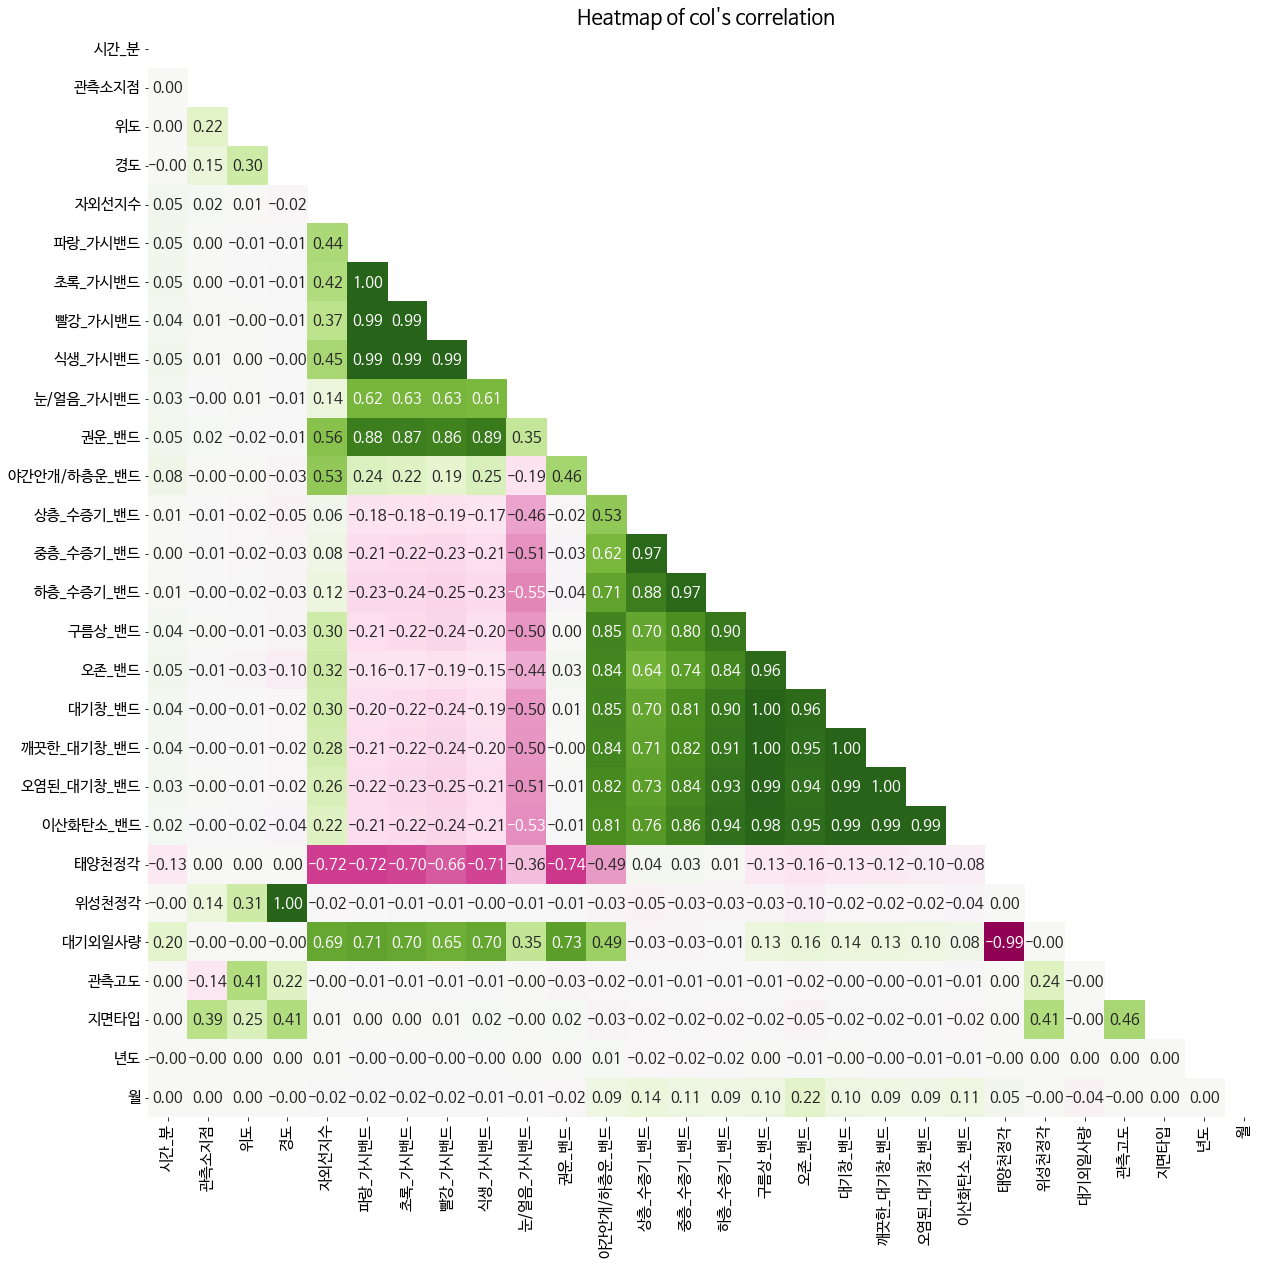

In [ ]:
import warnings
warnings.filterwarnings( 'ignore' )
df_corr = df.corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True, cmap='PiYG', fmt='.2f',center=0, mask= mask , cbar=False)
plt.title("Heatmap of col's correlation", fontsize=20)
plt.show()

In [ ]:
# 년도별 계절별 자외선지수

In [ ]:
df_20 = df[df['년도']==2020]
df_21 = df[df['년도']==2021]

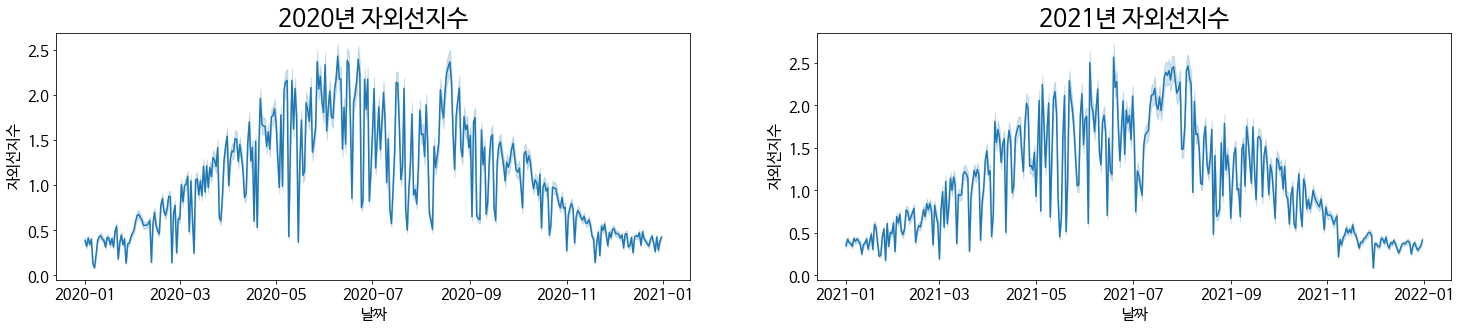

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=df_20.날짜, y=df_20.자외선지수)
plt.title("2020년 자외선지수", size = 24)
plt.subplot(222)
sns.lineplot(x=df_21.날짜, y=df_21.자외선지수)
plt.title("2021년 자외선지수", size = 24)
plt.show()

In [ ]:
df1_win = df_20[df_20['계절']=='겨울']
df1_sp = df_20[df_20['계절']=='봄']
df1_sum = df_20[df_20['계절']=='여름']
df1_fa = df_20[df_20['계절']=='가을']

In [ ]:
df2_win = df_21[df_21['계절']=='겨울']
df2_sp = df_21[df_21['계절']=='봄']
df2_sum = df_21[df_21['계절']=='여름']
df2_fa = df_21[df_21['계절']=='가을']

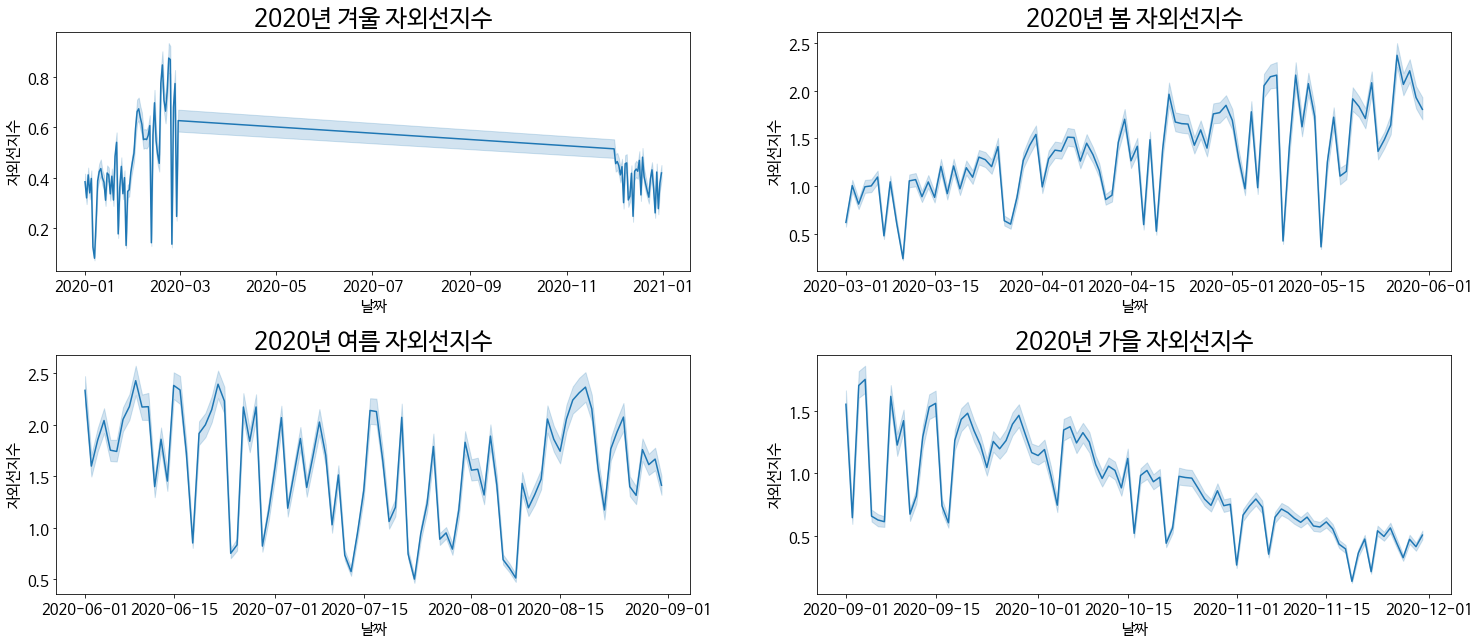

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=df1_win.날짜, y=df1_win.자외선지수)
plt.title("2020년 겨울 자외선지수", size = 24)
plt.subplot(222)
sns.lineplot(x=df1_sp.날짜, y=df1_sp.자외선지수)
plt.title("2020년 봄 자외선지수", size = 24)
plt.subplot(223)
sns.lineplot(x=df1_sum.날짜, y=df1_sum.자외선지수)
plt.title("2020년 여름 자외선지수", size = 24)
plt.subplot(224)
sns.lineplot(x=df1_fa.날짜, y=df1_fa.자외선지수)
plt.title("2020년 가을 자외선지수", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

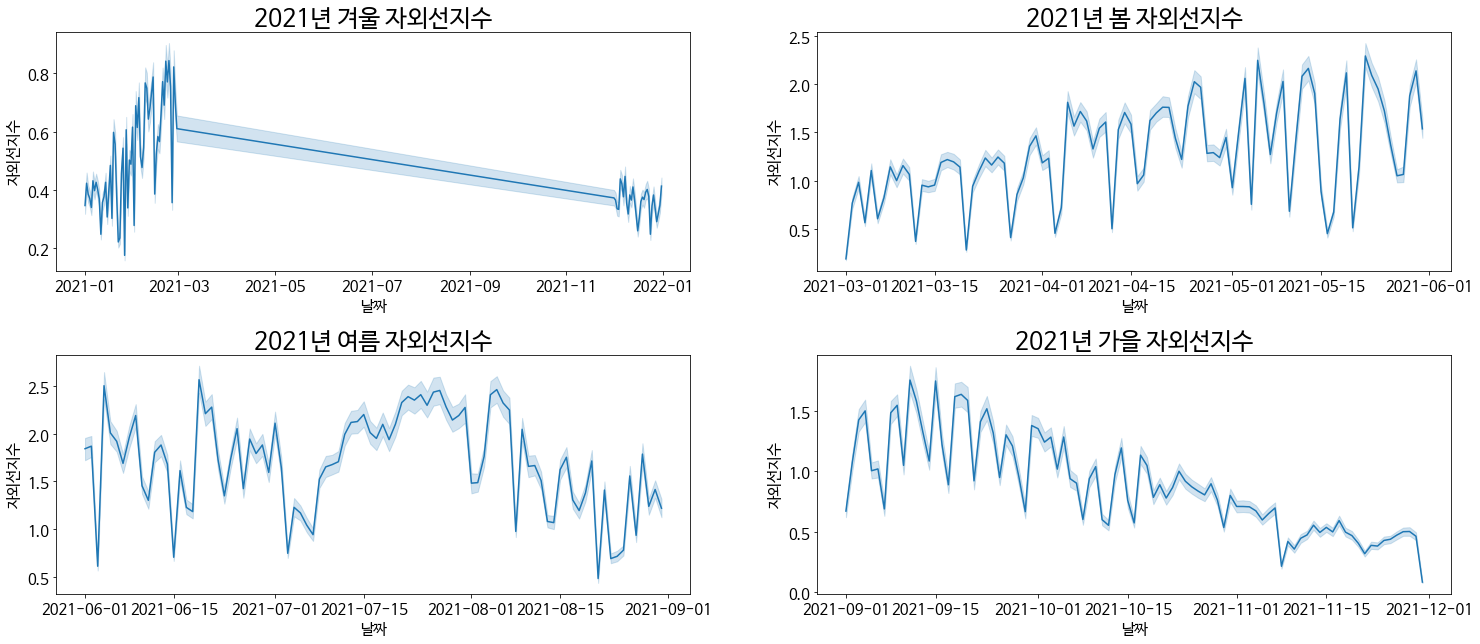

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=df2_win.날짜, y=df2_win.자외선지수)
plt.title("2021년 겨울 자외선지수", size = 24)
plt.subplot(222)
sns.lineplot(x=df2_sp.날짜, y=df2_sp.자외선지수)
plt.title("2021년 봄 자외선지수", size = 24)
plt.subplot(223)
sns.lineplot(x=df2_sum.날짜, y=df2_sum.자외선지수)
plt.title("2021년 여름 자외선지수", size = 24)
plt.subplot(224)
sns.lineplot(x=df2_fa.날짜, y=df2_fa.자외선지수)
plt.title("2021년 가을 자외선지수", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
# 관측소지점별 자외선지수

In [ ]:
ob13 = df[df['관측소지점'] ==13 ]
ob105 = df[df['관측소지점'] ==105 ]
ob108 = df[df['관측소지점'] ==108 ]
ob112 = df[df['관측소지점'] ==112 ]
ob115 = df[df['관측소지점'] ==115 ]
ob131 = df[df['관측소지점'] ==131 ]
ob132 = df[df['관측소지점'] ==132 ]
ob133 = df[df['관측소지점'] ==133 ]
ob138 = df[df['관측소지점'] ==138 ]
ob143 = df[df['관측소지점'] ==143 ]
ob146 = df[df['관측소지점'] ==146 ]
ob152 = df[df['관측소지점'] ==152 ]
ob156 = df[df['관측소지점'] ==156 ]
ob159 = df[df['관측소지점'] ==159 ]
ob165 = df[df['관측소지점'] ==165 ]

In [ ]:
ob13_2020 = ob13[ob13['년도'] ==2020 ]
ob13_2021 = ob13[ob13['년도'] ==2021 ]
ob105_2020 = ob13[ob13['년도'] ==2020 ]
ob105_2021 = ob13[ob13['년도'] ==2021 ]

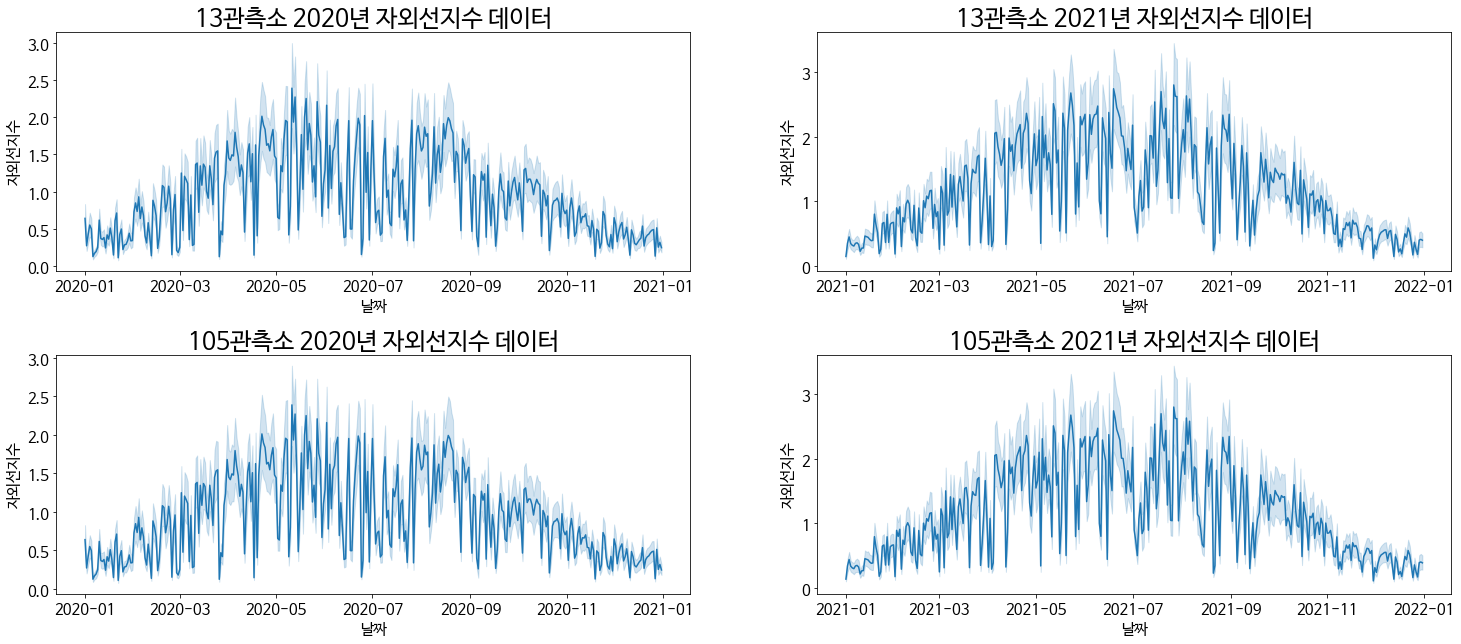

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob13_2020.날짜, y=ob13_2020.자외선지수)
plt.title("13관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob13_2021.날짜, y=ob13_2021.자외선지수)
plt.title("13관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob105_2020.날짜, y=ob105_2020.자외선지수)
plt.title("105관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob105_2021.날짜, y=ob105_2021.자외선지수)
plt.title("105관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob108_2020 = ob108[ob108['년도'] ==2020 ]
ob108_2021 = ob108[ob108['년도'] ==2021 ]
ob112_2020 = ob112[ob112['년도'] ==2020 ]
ob112_2021 = ob112[ob112['년도'] ==2021 ]

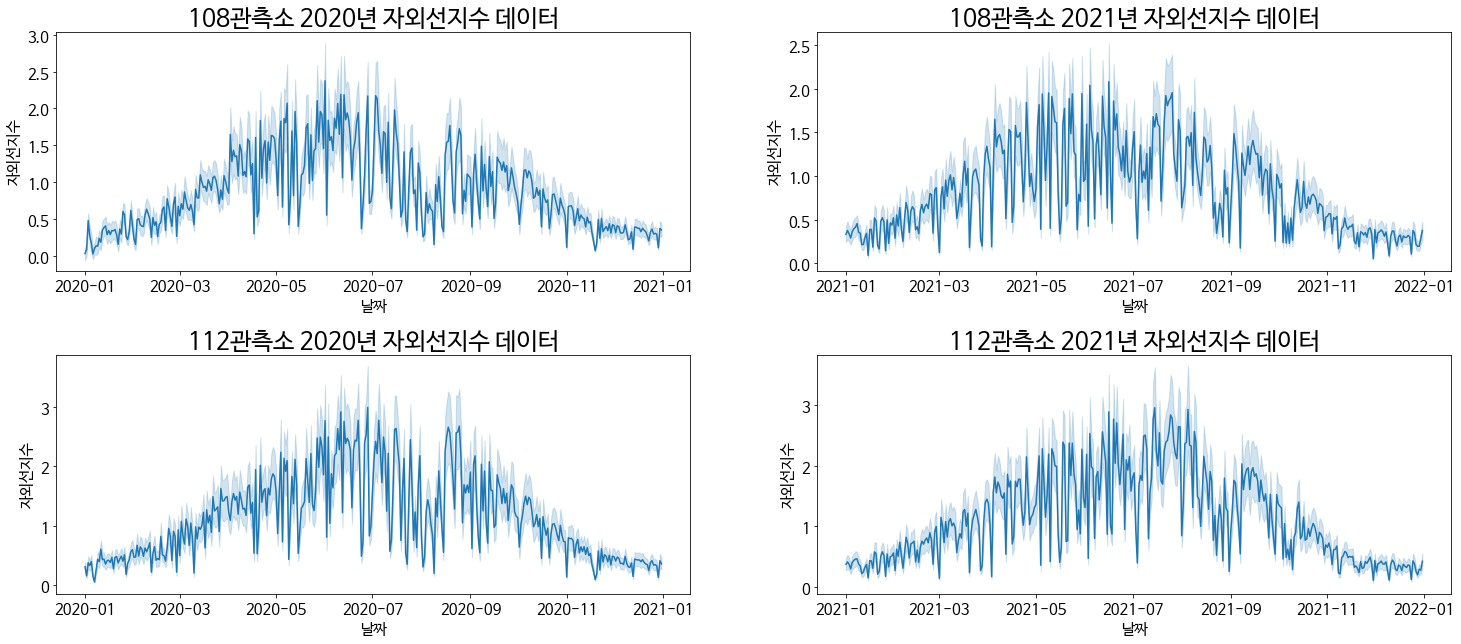

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob108_2020.날짜, y=ob108_2020.자외선지수)
plt.title("108관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob108_2021.날짜, y=ob108_2021.자외선지수)
plt.title("108관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob112_2020.날짜, y=ob112_2020.자외선지수)
plt.title("112관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob112_2021.날짜, y=ob112_2021.자외선지수)
plt.title("112관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob115_2020 = ob115[ob115['년도'] ==2020 ]
ob115_2021 = ob115[ob115['년도'] ==2021 ]
ob131_2020 = ob131[ob131['년도'] ==2020 ]
ob131_2021 = ob131[ob131['년도'] ==2021 ]

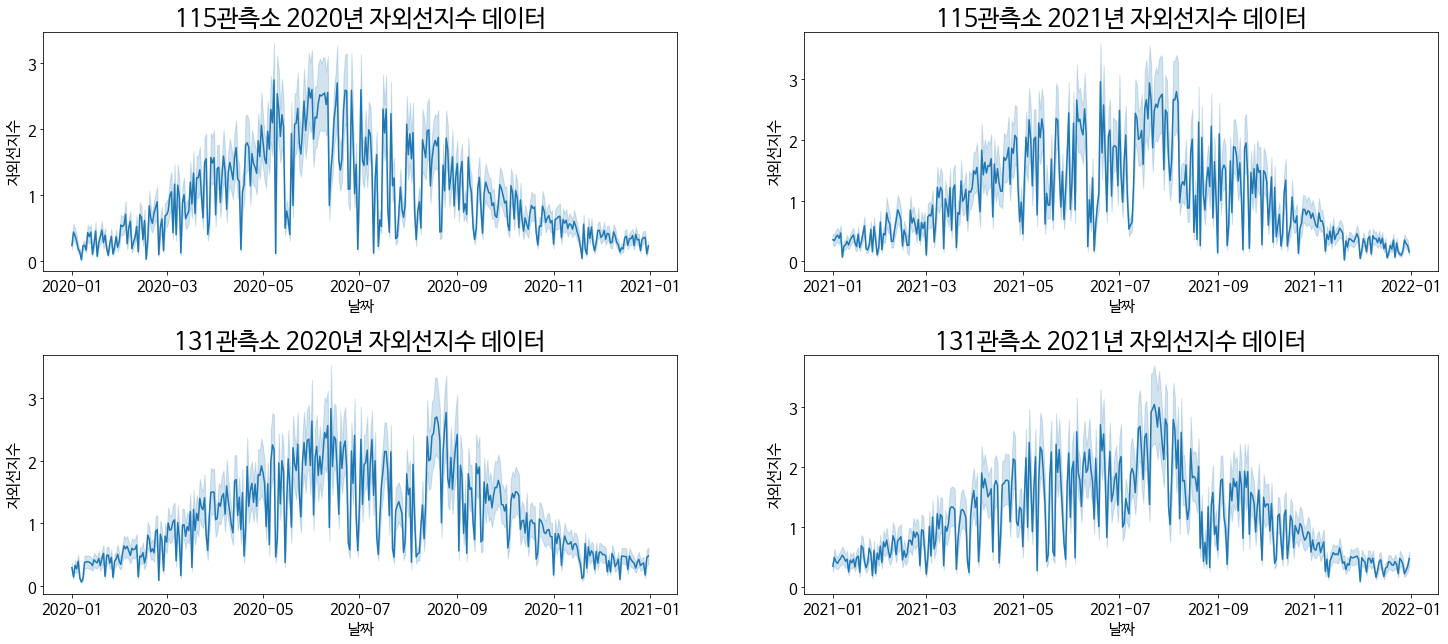

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob115_2020.날짜, y=ob115_2020.자외선지수)
plt.title("115관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob115_2021.날짜, y=ob115_2021.자외선지수)
plt.title("115관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob131_2020.날짜, y=ob131_2020.자외선지수)
plt.title("131관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob131_2021.날짜, y=ob131_2021.자외선지수)
plt.title("131관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob132_2020 = ob132[ob132['년도'] ==2020 ]
ob132_2021 = ob132[ob132['년도'] ==2021 ]
ob133_2020 = ob133[ob133['년도'] ==2020 ]
ob133_2021 = ob133[ob133['년도'] ==2021 ]

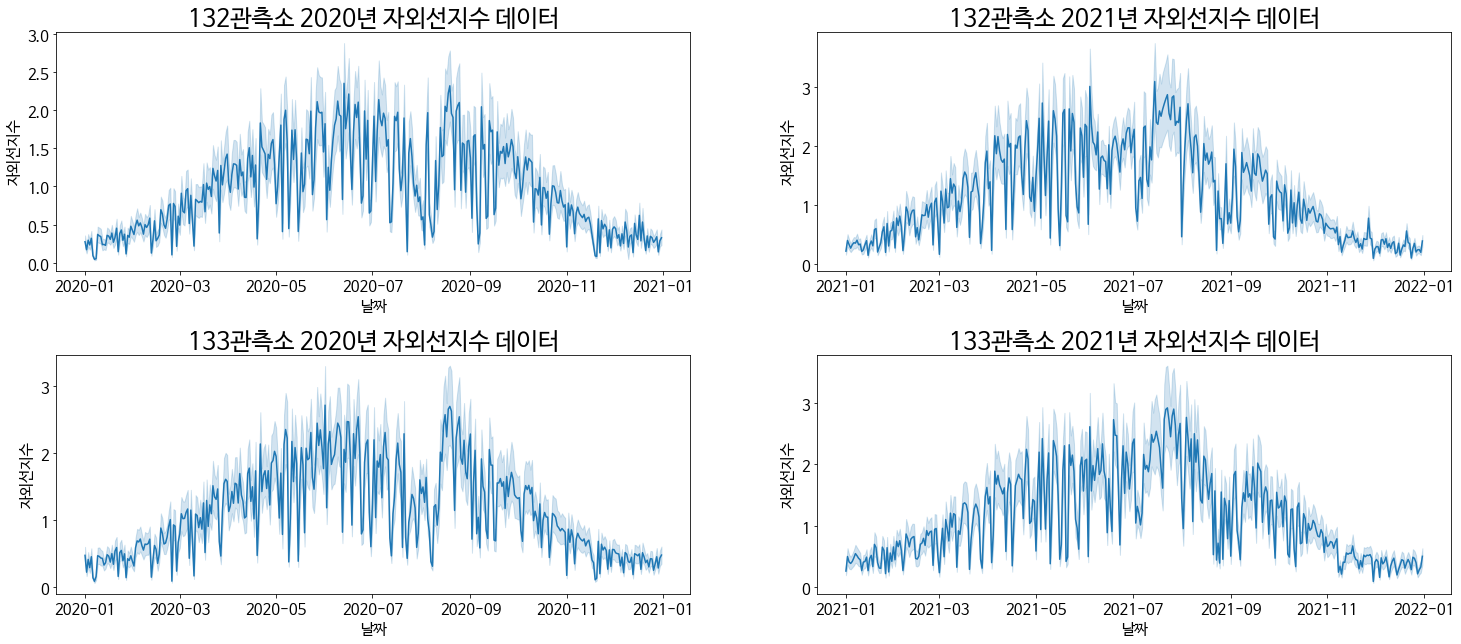

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob132_2020.날짜, y=ob132_2020.자외선지수)
plt.title("132관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob132_2021.날짜, y=ob132_2021.자외선지수)
plt.title("132관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob133_2020.날짜, y=ob133_2020.자외선지수)
plt.title("133관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob133_2021.날짜, y=ob133_2021.자외선지수)
plt.title("133관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob138_2020 = ob138[ob138['년도'] ==2020 ]
ob138_2021 = ob138[ob138['년도'] ==2021 ]
ob143_2020 = ob143[ob143['년도'] ==2020 ]
ob143_2021 = ob143[ob143['년도'] ==2021 ]

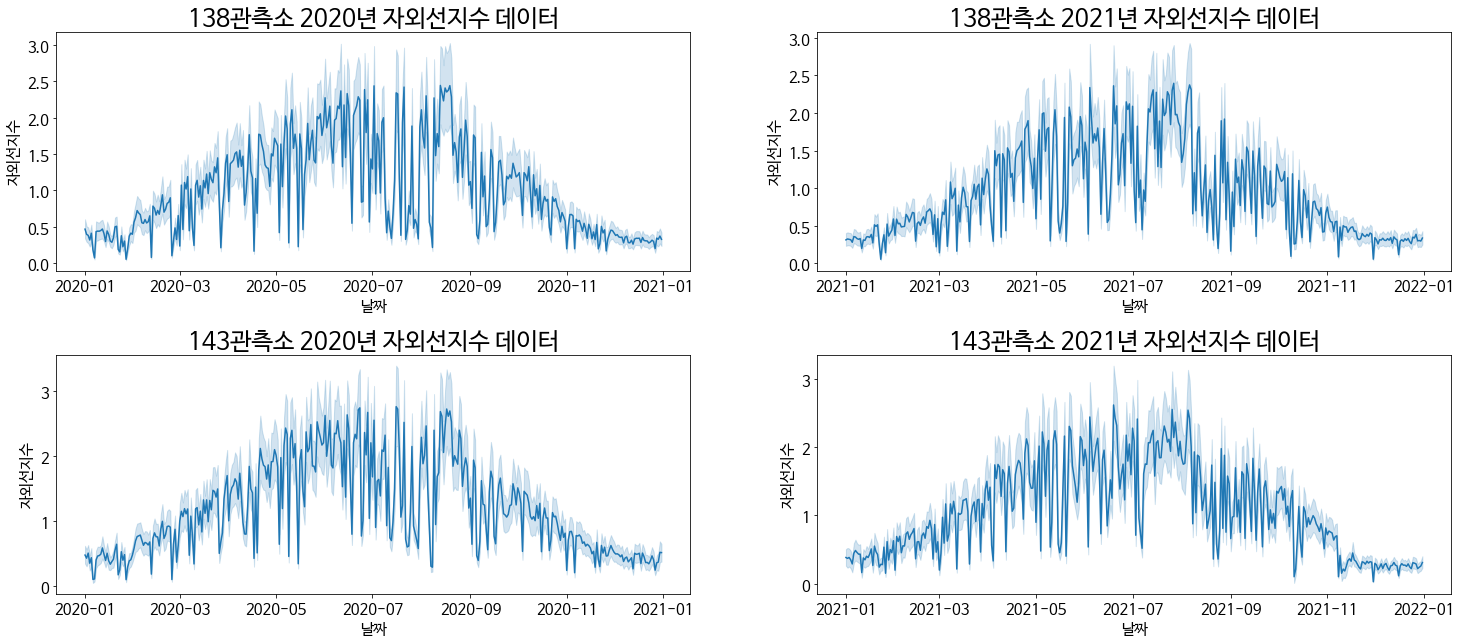

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob138_2020.날짜, y=ob138_2020.자외선지수)
plt.title("138관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob138_2021.날짜, y=ob138_2021.자외선지수)
plt.title("138관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob143_2020.날짜, y=ob143_2020.자외선지수)
plt.title("143관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob143_2021.날짜, y=ob143_2021.자외선지수)
plt.title("143관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob146_2020 = ob146[ob146['년도'] ==2020 ]
ob146_2021 = ob146[ob146['년도'] ==2021 ]
ob152_2020 = ob152[ob152['년도'] ==2020 ]
ob152_2021 = ob152[ob152['년도'] ==2021 ]

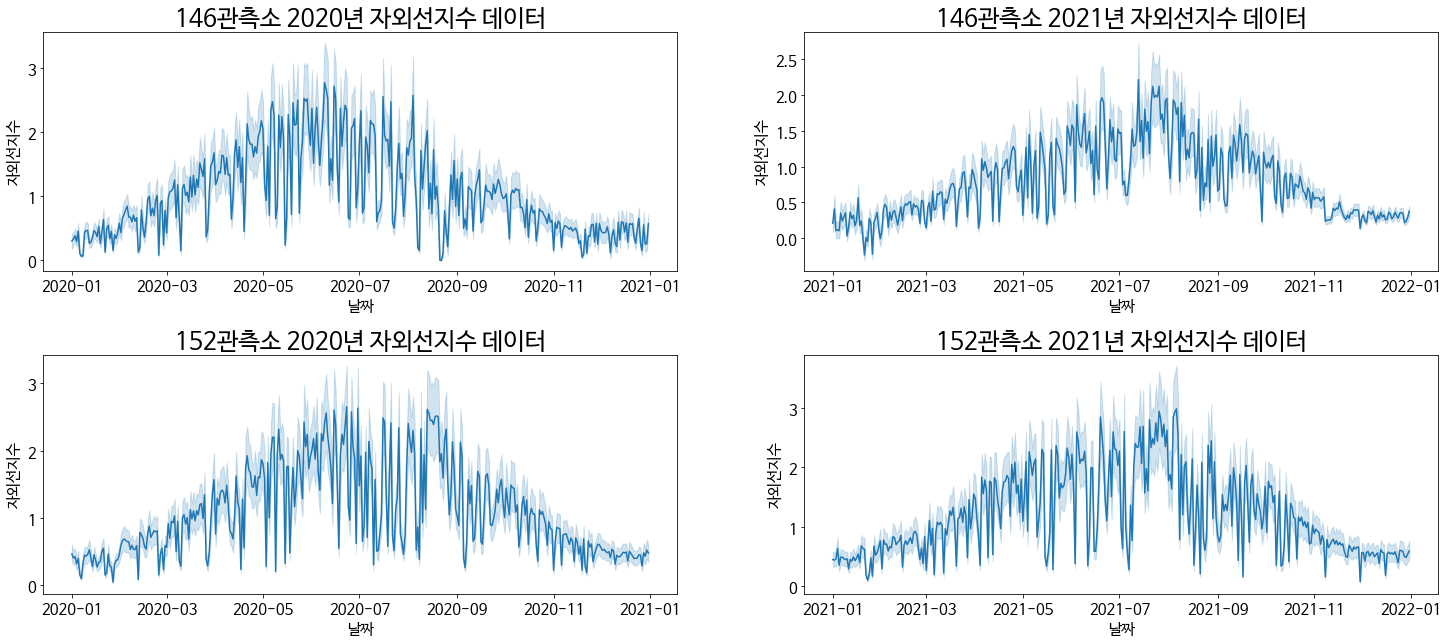

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob146_2020.날짜, y=ob146_2020.자외선지수)
plt.title("146관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob146_2021.날짜, y=ob146_2021.자외선지수)
plt.title("146관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob152_2020.날짜, y=ob152_2020.자외선지수)
plt.title("152관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob152_2021.날짜, y=ob152_2021.자외선지수)
plt.title("152관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob156_2020 = ob156[ob156['년도'] ==2020 ]
ob156_2021 = ob156[ob156['년도'] ==2021 ]
ob159_2020 = ob159[ob159['년도'] ==2020 ]
ob159_2021 = ob159[ob159['년도'] ==2021 ]

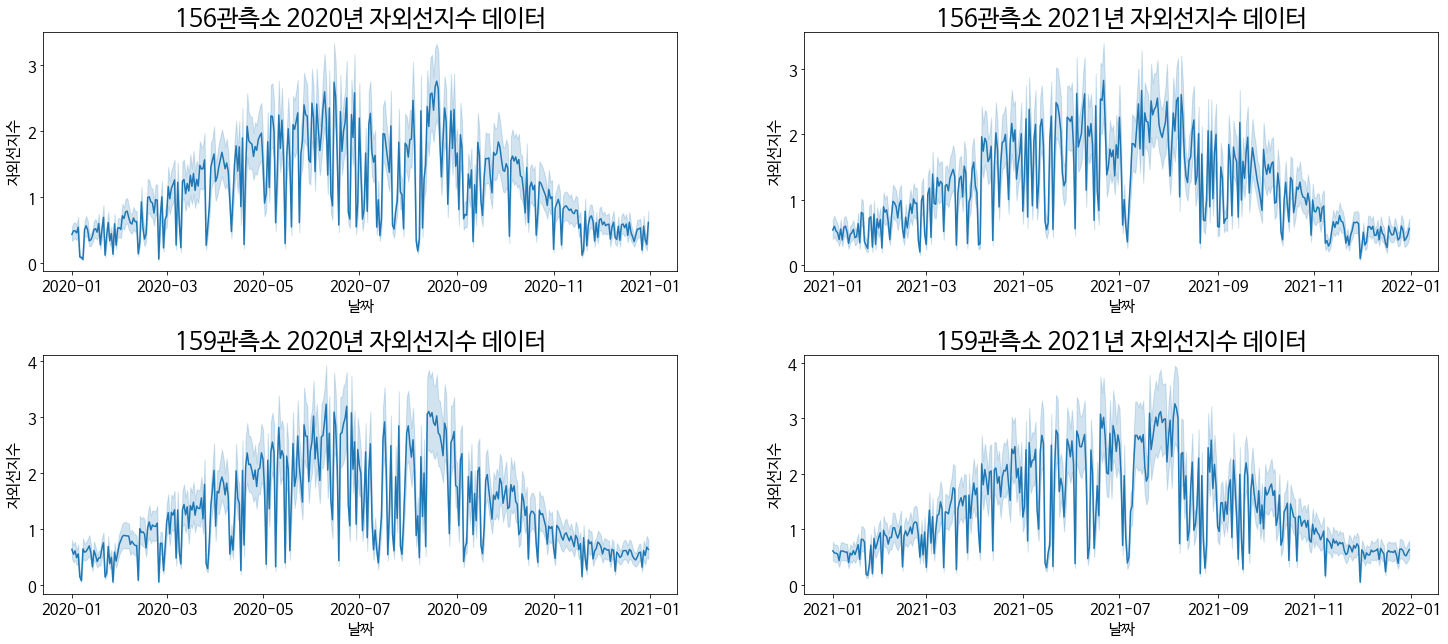

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.lineplot(x=ob156_2020.날짜, y=ob156_2020.자외선지수)
plt.title("156관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(222)
sns.lineplot(x=ob156_2021.날짜, y=ob156_2021.자외선지수)
plt.title("156관측소 2021년 자외선지수 데이터", size = 24)
plt.subplot(223)
sns.lineplot(x=ob159_2020.날짜, y=ob159_2020.자외선지수)
plt.title("159관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob159_2021.날짜, y=ob159_2021.자외선지수)
plt.title("159관측소 2021년 자외선지수 데이터", size = 24)
plt.subplots_adjust(left=0.125,
                   bottom=0.1,
                   right=0.9,
                   wspace=0.2,
                   hspace=0.35)
plt.show()

In [ ]:
ob165_2020 = ob165[ob165['년도'] ==2020 ]
ob165_2021 = ob165[ob165['년도'] ==2021 ]

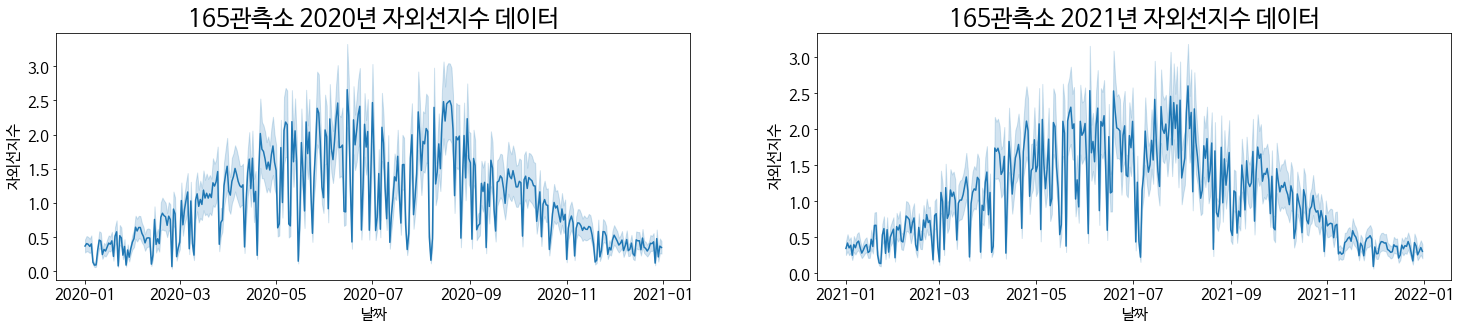

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(25,10))
plt.subplot(223)
sns.lineplot(x=ob165_2020.날짜, y=ob165_2020.자외선지수)
plt.title("165관측소 2020년 자외선지수 데이터", size = 24)
plt.subplot(224)
sns.lineplot(x=ob165_2021.날짜, y=ob165_2021.자외선지수)
plt.title("165관측소 2021년 자외선지수 데이터", size = 24)
plt.show()

In [ ]:
# 박스플롯

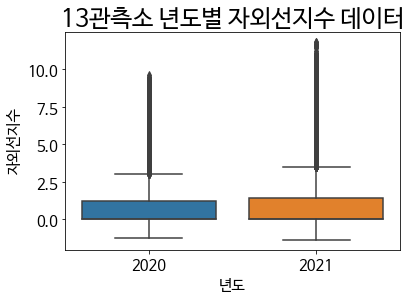

In [ ]:
plt.title("13관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob13)

plt.show()

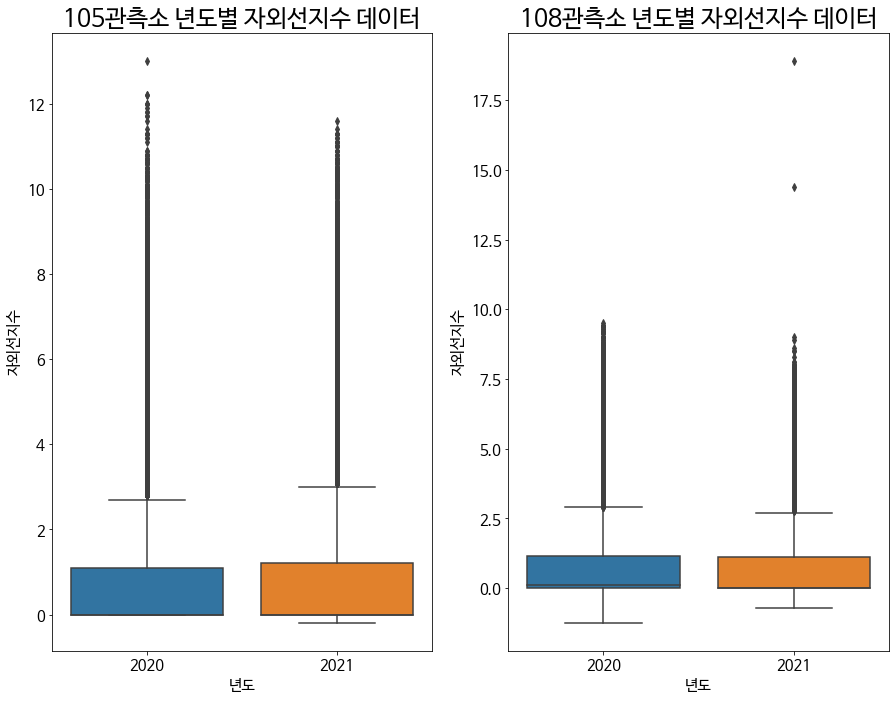

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("105관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob105)
plt.subplot(222)
plt.title("108관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob108)
plt.show()

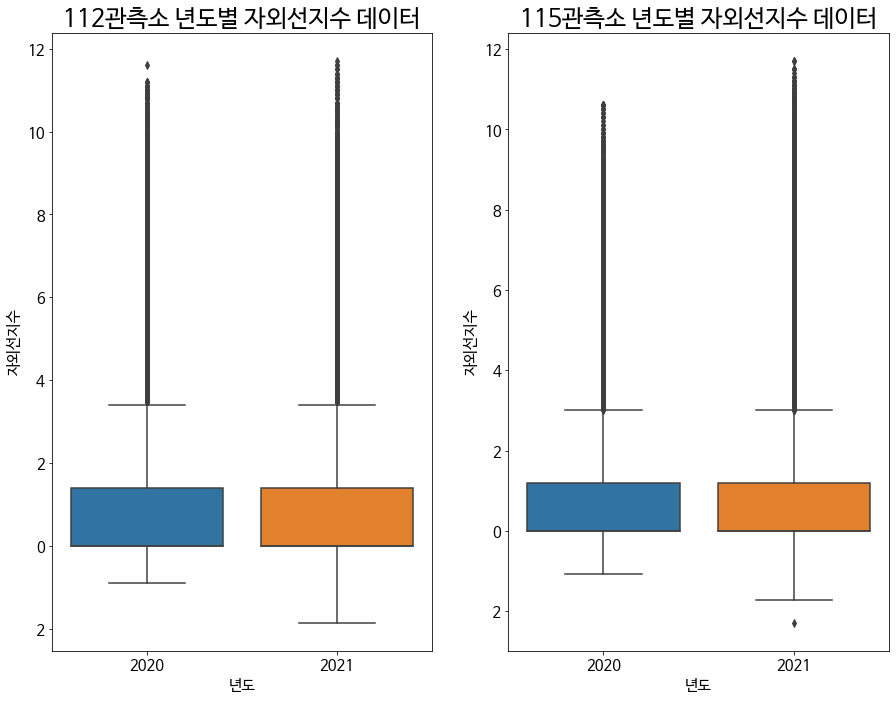

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("112관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob112)
plt.subplot(222)
plt.title("115관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob115)
plt.show()

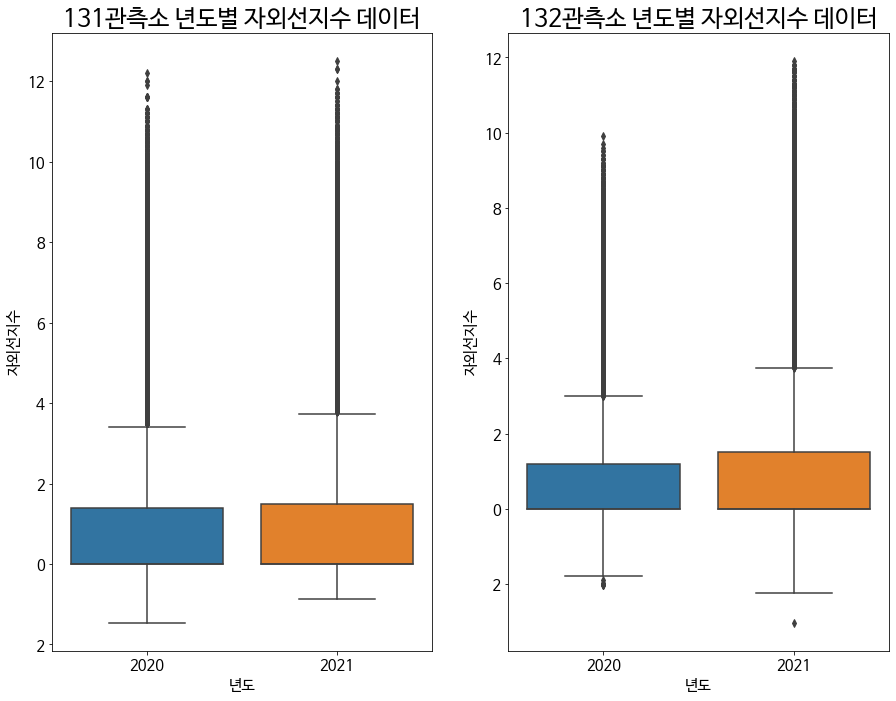

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("131관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob131)
plt.subplot(222)
plt.title("132관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob132)
plt.show()

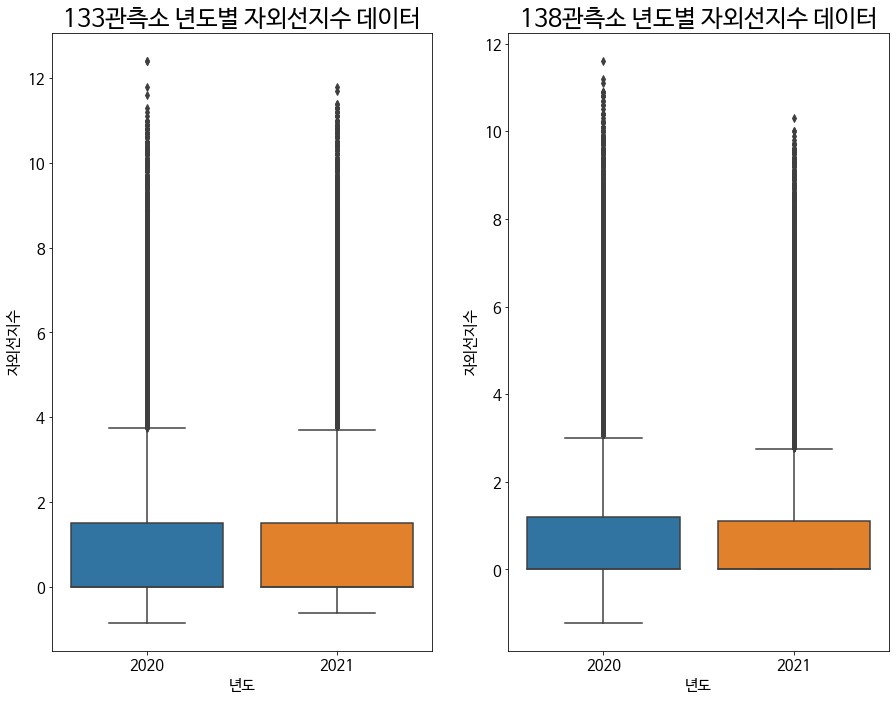

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("133관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob133)
plt.subplot(222)
plt.title("138관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob138)
plt.show()

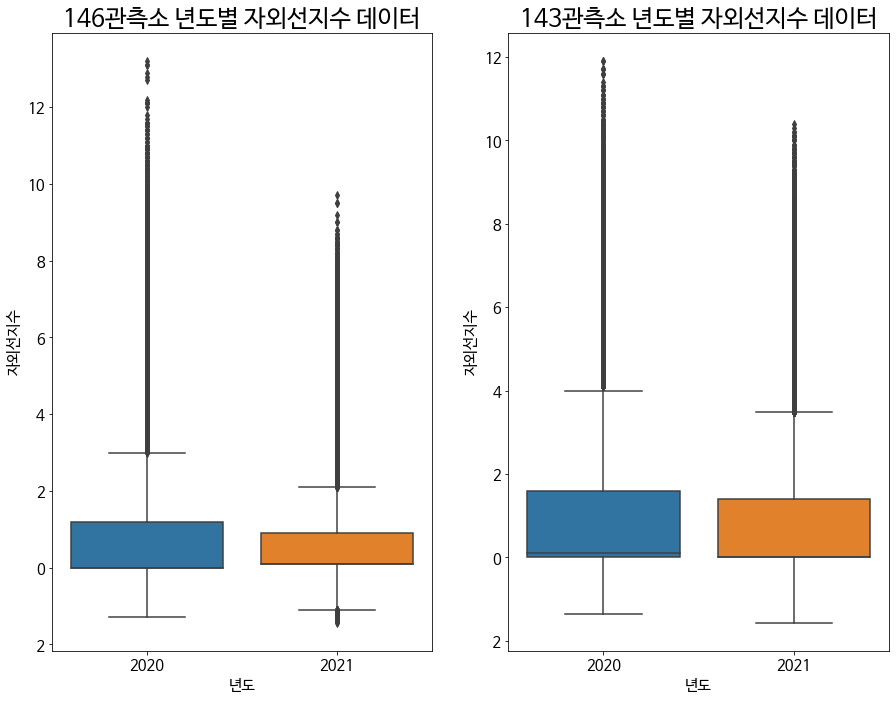

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("146관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob146)
plt.subplot(222)
plt.title("143관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob143)
plt.show()

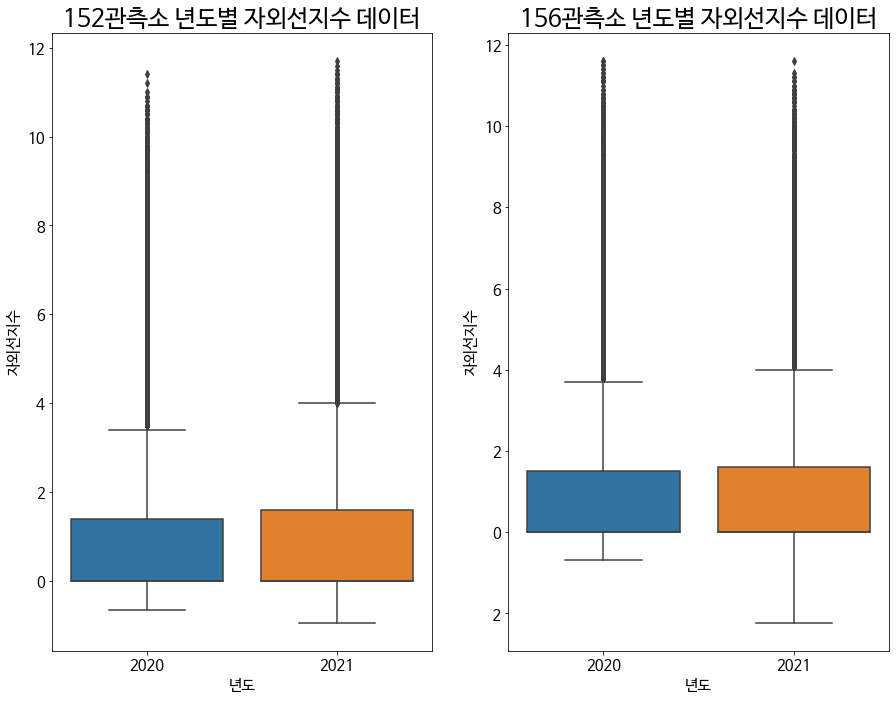

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("152관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob152)
plt.subplot(222)
plt.title("156관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob156)
plt.show()

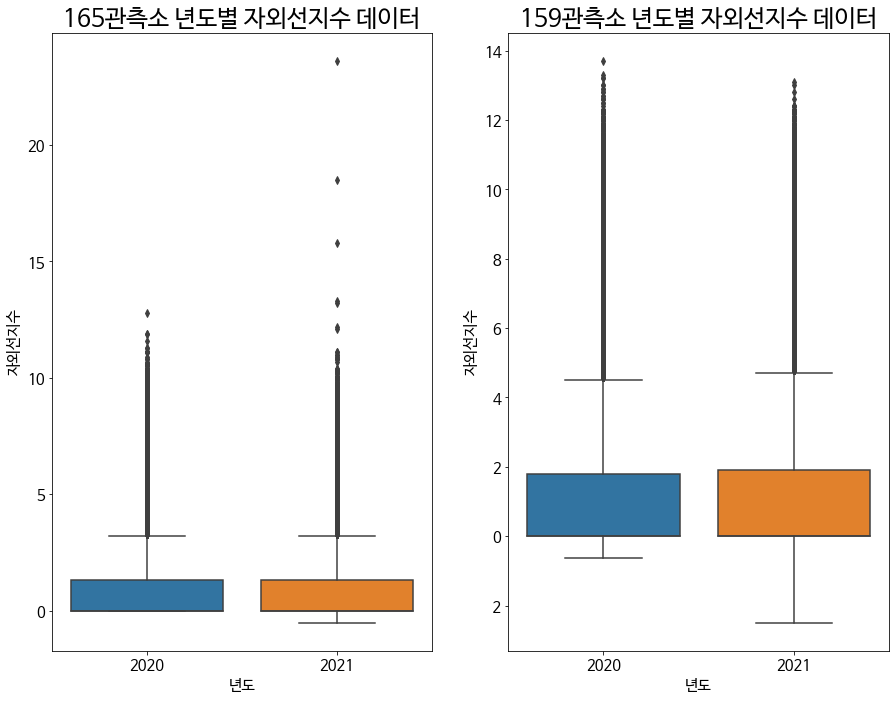

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.figure(figsize=(15,25))
plt.subplot(221)
plt.title("165관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob165)
plt.subplot(222)
plt.title("159관측소 년도별 자외선지수 데이터", size = 24)
sns.boxplot(x='년도',
           y='자외선지수',
           data=ob159)

plt.show()